<a href="https://colab.research.google.com/github/Vallabh409/image-calssification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  ***Multiclass Fish Image Classification***



##### **Project Type**    - Supervised Learning(Classification)
##### **Contribution**    - Individual
##### **Team Member 1 -** Bashyakarla vallabh

#**Project Summary -**

## 🐟 Multiclass Fish Image Classification

This deep learning project classifies images of fish into multiple species using Convolutional Neural Networks (CNNs). It includes:
- Training a custom CNN from scratch
- Applying transfer learning using VGG16, ResNet50, MobileNet, InceptionV3, and EfficientNetB0
- Evaluating models using accuracy, precision, recall, F1-score, and confusion matrix
- Saving the best-performing model
- Preparing for deployment via Streamlit for real-time fish species prediction


# **GitHub Link -**

https://github.com/Vallabh409/image-calssification

# **Problem Statement**


The goal of this project is to develop a deep learning-based image classification system that accurately identifies the species of fish from input images. The dataset consists of fish images organized by species into separate folders.

The challenge is twofold:

Model Development:

Train a custom Convolutional Neural Network (CNN) from scratch.

Leverage and fine-tune multiple pretrained models (VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0) using transfer learning to boost performance.

Deployment:

Build a user-friendly Streamlit web application that allows users to upload an image and receive the predicted fish category along with confidence scores.

The solution should be scalable, modular, and optimized for real-time use cases, such as species recognition in fishing, marine research, or educational applications.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# 📦 Basic Libraries
import numpy as np
import pandas as pd
import os
import random
import shutil
import zipfile

# 🖼️ Image and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# 🧠 TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

# ⚙️ Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# 📉 Suppress Warnings and Set Seeds
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Fish Classification/data.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_path = "/content/data/data/train"
val_path   = "/content/data/data/val"
test_path  = "/content/data/data/test"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


### What did you know about your dataset?

The dataset is organized into three folders: train, validation, and test, each containing subfolders representing fish species.

Each subfolder contains multiple images of a specific class, enabling multiclass classification.

The data is image-based, so traditional .head() or .info() methods don't apply.

We use ImageDataGenerator to load and preprocess the images, automatically labeling them based on folder names.

A total of 11 fish species are included across the dataset.

##  ***2.Data Preprocessing and Augmnetation***

### Rescale Images to [0,1] Range

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Rescale only for validation and test sets (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)


###Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)


###Visualize Augmented Images

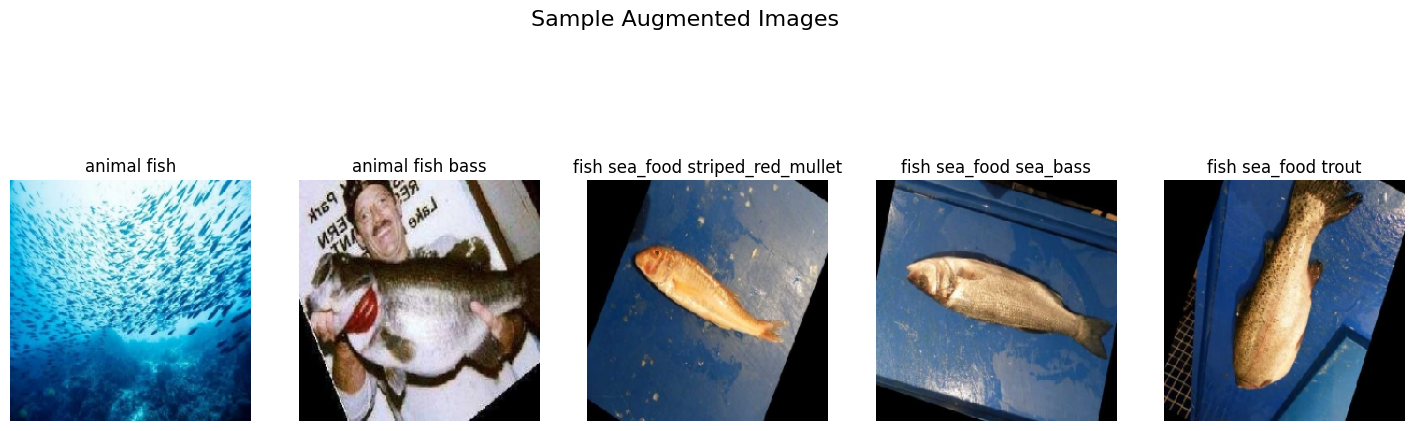

In [ ]:

class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(18, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.suptitle("Sample Augmented Images", fontsize=16)
plt.show()


## ***3. Model Training***

### 1.CNN Architecture

In [ ]:

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Multiclass output
])


###2.Compile the Model

In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


###3.Train the Model

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_accuracy', save_best_only=True)

history = model_cnn.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3069 - loss: 4.7849

195/195 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.3069 - loss: 4.7786 - val_accuracy: 0.1694 - val_loss: 41.8443
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2685 - loss: 2.4595

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.2684 - loss: 2.4591 - val_accuracy: 0.2418 - val_loss: 10.0907
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2682 - loss: 2.2737

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.2682 - loss: 2.2731 - val_accuracy: 0.2885 - val_loss: 2.1603
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2855 - loss: 1.9515

195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.2855 - loss: 1.9514 - val_accuracy: 0.2949 - val_loss: 2.0797
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.2910 - loss: 1.9069 - val_accuracy: 0.2619 - val_loss: 2.9770
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3027 - loss: 1.8315

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3027 - loss: 1.8316 - val_accuracy: 0.3086 - val_loss: 2.0667
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3038 - loss: 1.9569 - val_accuracy: 0.3059 - val_loss: 1.8078
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2970 - loss: 1.8764

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.2970 - loss: 1.8764 - val_accuracy: 0.3150 - val_loss: 1.9301
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3091 - loss: 1.8897

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.3091 - loss: 1.8898 - val_accuracy: 0.3278 - val_loss: 1.8519
Epoch 10/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.3185 - loss: 1.9224 - val_accuracy: 0.1712 - val_loss: 166.8343
Epoch 11/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.3104 - loss: 1.9585 - val_accuracy: 0.3242 - val_loss: 2.2197
Epoch 12/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3369 - loss: 1.7782 - val_accuracy: 0.3178 - val_loss: 4.3817
Epoch 13/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3346 - loss: 1.8407

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3345 - loss: 1.8408 - val_accuracy: 0.3938 - val_loss: 4.1293
Epoch 14/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.3390 - loss: 1.8291 - val_accuracy: 0.3242 - val_loss: 4.0979
Epoch 15/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3248 - loss: 1.7758

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3248 - loss: 1.7758 - val_accuracy: 0.3956 - val_loss: 2.4092
Epoch 16/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3332 - loss: 1.7855 - val_accuracy: 0.3608 - val_loss: 2.6983
Epoch 17/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3655 - loss: 1.6757

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.3655 - loss: 1.6758 - val_accuracy: 0.4002 - val_loss: 2.2423
Epoch 18/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3404 - loss: 1.7756

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3404 - loss: 1.7756 - val_accuracy: 0.4029 - val_loss: 2.0983
Epoch 19/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3516 - loss: 1.7300 - val_accuracy: 0.3938 - val_loss: 1.8149
Epoch 20/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3546 - loss: 1.6611 - val_accuracy: 0.3947 - val_loss: 1.6486
Epoch 21/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3555 - loss: 1.6380

195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.3554 - loss: 1.6382 - val_accuracy: 0.4139 - val_loss: 2.7654
Epoch 22/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3559 - loss: 1.6701

195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.3559 - loss: 1.6701 - val_accuracy: 0.4212 - val_loss: 1.7403
Epoch 23/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3554 - loss: 1.6296 - val_accuracy: 0.3892 - val_loss: 2.4088
Epoch 24/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.3618 - loss: 1.6214 - val_accuracy: 0.3599 - val_loss: 1.7484
Epoch 25/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3543 - loss: 1.6385 - val_accuracy: 0.4121 - val_loss: 1.6120


###4.Pre-trained Models

#####**Create Transfer Learning Training Function**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


def build_and_train_model(base_model_fn, model_name, train_generator, val_generator, num_classes, epochs=10):
    print(f"⏳ Training {model_name}...")

    base_model = base_model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint(f"{model_name}.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        callbacks=[checkpoint]
    )

    print(f"✅ {model_name} training complete.")
    return model, history, base_model # Return base_model as well

#####**Fine-tuning Steps**

In [ ]:
def fine_tune_model(model, base_model, train_generator, val_generator, model_name, epochs=10):
    # Access the base model as the first layer of the provided model
    actual_base_model = base_model # Use the passed base_model directly

    # Unfreeze base layers for fine-tuning
    for layer in actual_base_model.layers:
        layer.trainable = True

    # Re-compile the model with a lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Fine-tune the model
    # Save in .keras format
    checkpoint = ModelCheckpoint(f"{model_name}_finetuned.keras", save_best_only=True)

    fine_tune_history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[checkpoint]
    )

    return model, fine_tune_history

######Why Fine-Tuning?
Pre-trained models are trained on large general datasets (like ImageNet). Fine-tuning helps them:

Learn domain-specific features (fish in this case)

Improve accuracy and generalization

Avoid underfitting on complex classes or features

####**Model 1: VGG16**

In [ ]:
#Train with VGG16
vgg_model, vgg_history, vgg_base_model = build_and_train_model( # Capture base_model
    base_model_fn=VGG16,
    model_name='VGG16_model',
    train_generator=train_generator,
    val_generator=val_generator,
    num_classes=train_generator.num_classes,
    epochs=10
)

⏳ Training VGG16_model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.1084 - loss: 2.5235
Epoch 1: val_accuracy improved from -inf to 0.27747, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.1086 - loss: 2.5227 - val_accuracy: 0.2775 - val_loss: 2.1159
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.2874 - loss: 2.0792
Epoch 2: val_accuracy improved from 0.27747 to 0.45696, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.2875 - loss: 2.0788 - val_accuracy: 0.4570 - val_loss: 1.8910
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.3976 - loss: 1.8671
Epoch 3: val_accuracy improved from 0.45696 to 0.57601, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 209ms/step - accuracy: 0.3978 - loss: 1.8668 - val_accuracy: 0.5760 - val_loss: 1.7118
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.4947 - loss: 1.7032
Epoch 4: val_accuracy improved from 0.57601 to 0.63462, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.4948 - loss: 1.7029 - val_accuracy: 0.6346 - val_loss: 1.5707
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5711 - loss: 1.5357
Epoch 5: val_accuracy improved from 0.63462 to 0.67766, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.5711 - loss: 1.5356 - val_accuracy: 0.6777 - val_loss: 1.4407
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6178 - loss: 1.4197
Epoch 6: val_accuracy improved from 0.67766 to 0.71978, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - accuracy: 0.6179 - loss: 1.4196 - val_accuracy: 0.7198 - val_loss: 1.3244
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6652 - loss: 1.2917
Epoch 7: val_accuracy improved from 0.71978 to 0.74084, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.6652 - loss: 1.2916 - val_accuracy: 0.7408 - val_loss: 1.2214
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6888 - loss: 1.2015
Epoch 8: val_accuracy improved from 0.74084 to 0.76282, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.6889 - loss: 1.2014 - val_accuracy: 0.7628 - val_loss: 1.1264
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7289 - loss: 1.1060
Epoch 9: val_accuracy improved from 0.76282 to 0.78114, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 192ms/step - accuracy: 0.7289 - loss: 1.1060 - val_accuracy: 0.7811 - val_loss: 1.0476
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7385 - loss: 1.0398
Epoch 10: val_accuracy improved from 0.78114 to 0.79579, saving model to VGG16_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 46s 215ms/step - accuracy: 0.7386 - loss: 1.0397 - val_accuracy: 0.7958 - val_loss: 0.9731
✅ VGG16_model training complete.


In [ ]:
# Fine-tune VGG16
vgg_model, vgg_finetune_history = fine_tune_model(
    model=vgg_model,
    base_model=vgg_base_model, # Pass the correct base model instance
    train_generator=train_generator,
    val_generator=val_generator,
    model_name='VGG16_model',
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 629ms/step - accuracy: 0.8391 - loss: 0.5599 - val_accuracy: 0.9725 - val_loss: 0.1507
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.9743 - loss: 0.1095 - val_accuracy: 0.9799 - val_loss: 0.0911
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 507ms/step - accuracy: 0.9824 - loss: 0.0744 - val_accuracy: 0.9835 - val_loss: 0.0731
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 508ms/step - accuracy: 0.9914 - loss: 0.0363 - val_accuracy: 0.9899 - val_loss: 0.0667
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 532ms/step - accuracy: 0.9958 - loss: 0.0193 - val_accuracy: 0.9908 - val_loss: 0.0466


#####Why VGG16?

 VGG16 is a classic CNN architecture known for its simplicity and depth. It uses small 3x3 filters and a deep architecture that works well for image classification tasks, especially when fine-tuned with good quality data.

#####Business Insight:
This model is a good starting point. If it performs well, we can consider it as a benchmark model for future comparisons.

####**Model 2: ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet_model, resnet_history, resnet_base_model = build_and_train_model( # Capture base_model
    base_model_fn=ResNet50,
    model_name='ResNet50_model',
    train_generator=train_generator,
    val_generator=val_generator,
    num_classes=train_generator.num_classes,
    epochs=10
)

⏳ Training ResNet50_model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.1241 - loss: 2.4497
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 48s 170ms/step - accuracy: 0.1242 - loss: 2.4493 - val_accuracy: 0.1712 - val_loss: 2.2686
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1824 - loss: 2.2683
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.1824 - loss: 2.2682 - val_accuracy: 0.1712 - val_loss: 2.2311
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1965 - loss: 2.2229
Epoch 3: val_accuracy improved from 0.17125 to 0.17857, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.1965 - loss: 2.2229 - val_accuracy: 0.1786 - val_loss: 2.1897
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2119 - loss: 2.1749
Epoch 4: val_accuracy did not improve from 0.17857
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.2119 - loss: 2.1749 - val_accuracy: 0.1722 - val_loss: 2.1554
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2186 - loss: 2.1455
Epoch 5: val_accuracy improved from 0.17857 to 0.26923, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.2187 - loss: 2.1455 - val_accuracy: 0.2692 - val_loss: 2.1234
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2402 - loss: 2.1178
Epoch 6: val_accuracy improved from 0.26923 to 0.28114, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.2402 - loss: 2.1178 - val_accuracy: 0.2811 - val_loss: 2.0903
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2525 - loss: 2.0796
Epoch 7: val_accuracy improved from 0.28114 to 0.29670, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2525 - loss: 2.0796 - val_accuracy: 0.2967 - val_loss: 2.0635
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2551 - loss: 2.0521
Epoch 8: val_accuracy improved from 0.29670 to 0.32692, saving model to ResNet50_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2551 - loss: 2.0521 - val_accuracy: 0.3269 - val_loss: 2.0362
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2792 - loss: 2.0202
Epoch 9: val_accuracy did not improve from 0.32692
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.2792 - loss: 2.0202 - val_accuracy: 0.2656 - val_loss: 2.0155
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2790 - loss: 2.0100
Epoch 10: val_accuracy did not improve from 0.32692
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.2790 - loss: 2.0100 - val_accuracy: 0.2940 - val_loss: 1.9959
✅ ResNet50_model training complete.


In [ ]:
# Fine-tune ResNet50
resnet_model, resnet_finetune_history = fine_tune_model(
    model=resnet_model,
    base_model=resnet_base_model, # Pass the correct base model instance
    train_generator=train_generator,
    val_generator=val_generator,
    model_name='ResNet50_model',
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 153s 464ms/step - accuracy: 0.2300 - loss: 11.0812 - val_accuracy: 0.1712 - val_loss: 165.1774
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 303ms/step - accuracy: 0.6995 - loss: 1.0931 - val_accuracy: 0.1712 - val_loss: 110.7788
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 306ms/step - accuracy: 0.9339 - loss: 0.3192 - val_accuracy: 0.1712 - val_loss: 38.0575
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 307ms/step - accuracy: 0.9754 - loss: 0.1271 - val_accuracy: 0.1777 - val_loss: 10.2622
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 309ms/step - accuracy: 0.9885 - loss: 0.0641 - val_accuracy: 0.8013 - val_loss: 0.6721


#####Why ResNet50?
 ResNet50 introduces skip connections which solve the vanishing gradient problem. It is deeper and more efficient than VGG16 and often performs better on complex datasets.

##### Business Insight:
ResNet50 is used in real-world applications like object detection and medical imaging. If this model performs best, it could become the production-ready model.

####**Model 3: MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet

mobilenet_model, mobilenet_history, mobilenet_base_model = build_and_train_model( # Capture base_model
    base_model_fn=MobileNet,
    model_name='MobileNet_model',
    train_generator=train_generator,
    val_generator=val_generator,
    num_classes=train_generator.num_classes,
    epochs=10
)

⏳ Training MobileNet_model...
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3836 - loss: 1.9196
Epoch 1: val_accuracy improved from -inf to 0.91026, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - accuracy: 0.3855 - loss: 1.9142 - val_accuracy: 0.9103 - val_loss: 0.6063
Epoch 2/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8359 - loss: 0.6080
Epoch 2: val_accuracy improved from 0.91026 to 0.95513, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.8362 - loss: 0.6072 - val_accuracy: 0.9551 - val_loss: 0.2861
Epoch 3/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9169 - loss: 0.3447
Epoch 3: val_accuracy improved from 0.95513 to 0.96886, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9170 - loss: 0.3443 - val_accuracy: 0.9689 - val_loss: 0.1810
Epoch 4/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9478 - loss: 0.2299
Epoch 4: val_accuracy improved from 0.96886 to 0.98077, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9479 - loss: 0.2297 - val_accuracy: 0.9808 - val_loss: 0.1196
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9683 - loss: 0.1563
Epoch 5: val_accuracy improved from 0.98077 to 0.98718, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9683 - loss: 0.1563 - val_accuracy: 0.9872 - val_loss: 0.0867
Epoch 6/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9727 - loss: 0.1231
Epoch 6: val_accuracy did not improve from 0.98718
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.9727 - loss: 0.1230 - val_accuracy: 0.9872 - val_loss: 0.0764
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9785 - loss: 0.1042
Epoch 7: val_accuracy improved from 0.98718 to 0.98901, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9785 - loss: 0.1041 - val_accuracy: 0.9890 - val_loss: 0.0610
Epoch 8/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9860 - loss: 0.0802
Epoch 8: val_accuracy improved from 0.98901 to 0.99084, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.9860 - loss: 0.0802 - val_accuracy: 0.9908 - val_loss: 0.0518
Epoch 9/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9882 - loss: 0.0649
Epoch 9: val_accuracy did not improve from 0.99084
195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9882 - loss: 0.0649 - val_accuracy: 0.9908 - val_loss: 0.0447
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9918 - loss: 0.0540
Epoch 10: val_accuracy improved from 0.99084 to 0.99634, saving model to MobileNet_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9918 - loss: 0.0540 - val_accuracy: 0.9963 - val_loss: 0.0332
✅ MobileNet_model training complete.


In [ ]:
# Fine-tune MobileNet
mobilenet_model, mobilenet_finetune_history = fine_tune_model(
    model=mobilenet_model,
    base_model=mobilenet_base_model, # Pass the correct base model instance
    train_generator=train_generator,
    val_generator=val_generator,
    model_name='MobileNet_model',
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 193ms/step - accuracy: 0.4753 - loss: 2.7533 - val_accuracy: 0.9799 - val_loss: 0.0698
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9457 - loss: 0.1884 - val_accuracy: 0.9863 - val_loss: 0.0397
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9768 - loss: 0.0786 - val_accuracy: 0.9945 - val_loss: 0.0279
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.9822 - loss: 0.0633 - val_accuracy: 0.9936 - val_loss: 0.0215
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9896 - loss: 0.0419 - val_accuracy: 0.9963 - val_loss: 0.0184


#####Why MobileNet?
MobileNet is optimized for mobile and edge devices. It’s lightweight, fast, and efficient while still achieving good performance.

#####Business Insight:
If MobileNet performs well, it’s ideal for low-latency apps such as mobile fish identification tools or field apps for fisheries.

####**Model 4: InceptionV3**

In [ ]:
from tensorflow.keras.applications import InceptionV3

inception_model, inception_history, inception_base_model = build_and_train_model( # Capture base_model
    base_model_fn=InceptionV3,
    model_name='InceptionV3_model',
    train_generator=train_generator,
    val_generator=val_generator,
    num_classes=train_generator.num_classes,
    epochs=10
)

⏳ Training InceptionV3_model...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4186 - loss: 1.7673
Epoch 1: val_accuracy improved from -inf to 0.89744, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 56s 197ms/step - accuracy: 0.4196 - loss: 1.7644 - val_accuracy: 0.8974 - val_loss: 0.4754
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8590 - loss: 0.4974
Epoch 2: val_accuracy improved from 0.89744 to 0.93315, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.8590 - loss: 0.4972 - val_accuracy: 0.9332 - val_loss: 0.2812
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9173 - loss: 0.3060
Epoch 3: val_accuracy improved from 0.93315 to 0.95421, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.9173 - loss: 0.3059 - val_accuracy: 0.9542 - val_loss: 0.2079
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9333 - loss: 0.2355
Epoch 4: val_accuracy improved from 0.95421 to 0.95971, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.9333 - loss: 0.2355 - val_accuracy: 0.9597 - val_loss: 0.1652
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9547 - loss: 0.1788
Epoch 5: val_accuracy improved from 0.95971 to 0.96703, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9547 - loss: 0.1788 - val_accuracy: 0.9670 - val_loss: 0.1389
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9651 - loss: 0.1352
Epoch 6: val_accuracy improved from 0.96703 to 0.97253, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9651 - loss: 0.1352 - val_accuracy: 0.9725 - val_loss: 0.1163
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9691 - loss: 0.1244
Epoch 7: val_accuracy improved from 0.97253 to 0.97619, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9691 - loss: 0.1244 - val_accuracy: 0.9762 - val_loss: 0.1006
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9727 - loss: 0.1035
Epoch 8: val_accuracy did not improve from 0.97619
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9727 - loss: 0.1035 - val_accuracy: 0.9689 - val_loss: 0.0983
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9783 - loss: 0.0931
Epoch 9: val_accuracy improved from 0.97619 to 0.98077, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9783 - loss: 0.0930 - val_accuracy: 0.9808 - val_loss: 0.0857
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9828 - loss: 0.0756
Epoch 10: val_accuracy improved from 0.98077 to 0.98260, saving model to InceptionV3_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9828 - loss: 0.0756 - val_accuracy: 0.9826 - val_loss: 0.0768
✅ InceptionV3_model training complete.


In [ ]:
# Fine-tune InceptionV3
inception_model, inception_finetune_history = fine_tune_model(
    model=inception_model,
    base_model=inception_base_model, # Pass the correct base model instance
    train_generator=train_generator,
    val_generator=val_generator,
    model_name='InceptionV3_model',
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 518ms/step - accuracy: 0.5210 - loss: 1.8407 - val_accuracy: 0.9780 - val_loss: 0.0815
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 246ms/step - accuracy: 0.9702 - loss: 0.1429 - val_accuracy: 0.9881 - val_loss: 0.0464
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 51s 262ms/step - accuracy: 0.9863 - loss: 0.0645 - val_accuracy: 0.9908 - val_loss: 0.0340
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 49s 251ms/step - accuracy: 0.9937 - loss: 0.0382 - val_accuracy: 0.9918 - val_loss: 0.0255
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.9967 - loss: 0.0227 - val_accuracy: 0.9927 - val_loss: 0.0198


#####Why InceptionV3?
A: InceptionV3 uses different kernel sizes in the same layer, capturing features at multiple scales. It’s deeper than MobileNet and more efficient than VGG16.

#####Business Insight:
InceptionV3 is well-suited for datasets with visual complexity. A good performance here could mean our fish images benefit from multi-scale feature learning.

####**Model 5: EfficientNetB0**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

efficientnet_model, efficientnet_history, efficientnet_base_model = build_and_train_model( # Capture base_model
    base_model_fn=EfficientNetB0,
    model_name='EfficientNetB0_model',
    train_generator=train_generator,
    val_generator=val_generator,
    num_classes=train_generator.num_classes,
    epochs=10
)

⏳ Training EfficientNetB0_model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.1524 - loss: 2.3588
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to EfficientNetB0_model.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 62s 194ms/step - accuracy: 0.1525 - loss: 2.3586 - val_accuracy: 0.1712 - val_loss: 2.3144
Epoch 2/10
194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1648 - loss: 2.3216
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.1649 - loss: 2.3216 - val_accuracy: 0.1712 - val_loss: 2.3101
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1643 - loss: 2.3139
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.1643 - loss: 2.3139 - val_accuracy: 0.1712 - val_loss: 2.3123
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1828 - loss: 2.3080
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.1828 - loss: 2.3080 - val_accuracy: 0.1712 - val_loss: 2.3109
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1666 - loss: 2.3185
Epoch 5: val_accuracy 

In [ ]:
# Fine-tune EfficientNetB0
efficientnet_model, efficientnet_finetune_history = fine_tune_model(
    model=efficientnet_model,
    base_model=efficientnet_base_model, # Pass the correct base model instance
    train_generator=train_generator,
    val_generator=val_generator,
    model_name='EfficientNetB0_model',
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 161s 415ms/step - accuracy: 0.1457 - loss: 2.3731 - val_accuracy: 0.1245 - val_loss: 2.3650
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.5151 - loss: 1.7867 - val_accuracy: 0.3004 - val_loss: 2.1053
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.7510 - loss: 1.1964 - val_accuracy: 0.2958 - val_loss: 1.9144
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 27s 140ms/step - accuracy: 0.8678 - loss: 0.7507 - val_accuracy: 0.8864 - val_loss: 0.7742
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - accuracy: 0.9358 - loss: 0.4238 - val_accuracy: 0.9322 - val_loss: 0.4511


##### Why EfficientNetB0?
EfficientNet scales up width, depth, and resolution systematically and is known for achieving high accuracy with fewer parameters.

#####Business Insight:
EfficientNet is ideal for balancing accuracy and efficiency. If it performs best, it will be our recommended deployment model for scalable solutions.

####Identify the Best Model Based on Validation Accuracy

In [ ]:

vgg_best_val_acc = max(vgg_finetune_history.history['val_accuracy'])
resnet_best_val_acc = max(resnet_finetune_history.history['val_accuracy'])
mobilenet_best_val_acc = max(mobilenet_finetune_history.history['val_accuracy'])
inception_best_val_acc = max(inception_finetune_history.history['val_accuracy'])
efficientnet_best_val_acc = max(efficientnet_finetune_history.history['val_accuracy'])


####Compare All Accuracies

In [ ]:
accuracies = {
    "VGG16": vgg_best_val_acc,
    "ResNet50": resnet_best_val_acc,
    "MobileNet": mobilenet_best_val_acc,
    "InceptionV3": inception_best_val_acc,
    "EfficientNetB0": efficientnet_best_val_acc
}

# Find the model with max accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"✅ Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


✅ Best Model: MobileNet with Accuracy: 0.9963


###Saving the Best Model

In [ ]:
# Assign the trained MobileNet model instance to best_model
best_model = mobilenet_model

# Save the best model in .h5 format
best_model.save('best_model.h5')


In [ ]:
from google.colab import files
files.download('best_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

with open('training_history.pkl', 'wb') as f:
    pickle.dump(mobilenet_finetune_history.history, f)

###What and Why

In this step, we build and train a Convolutional Neural Network (CNN) from scratch to classify fish images into multiple categories.

CNNs are powerful for image-related tasks because they can automatically detect features such as edges, shapes, and textures through layers of filters, without the need for manual feature extraction.

By training a custom CNN, we aim to:

* Build a lightweight and fast model tailored to our dataset.

* Establish a baseline performance before applying transfer learning.

* Understand the training dynamics (loss/accuracy curves) with our augmented data.

The model includes:

* Convolutional and pooling layers for feature extraction

* Batch normalization for faster convergence

* Dropout for regularization

* A softmax layer for multiclass prediction



##**4. Model Evaluation**

###Plot Training & Validation Accuracy / Loss

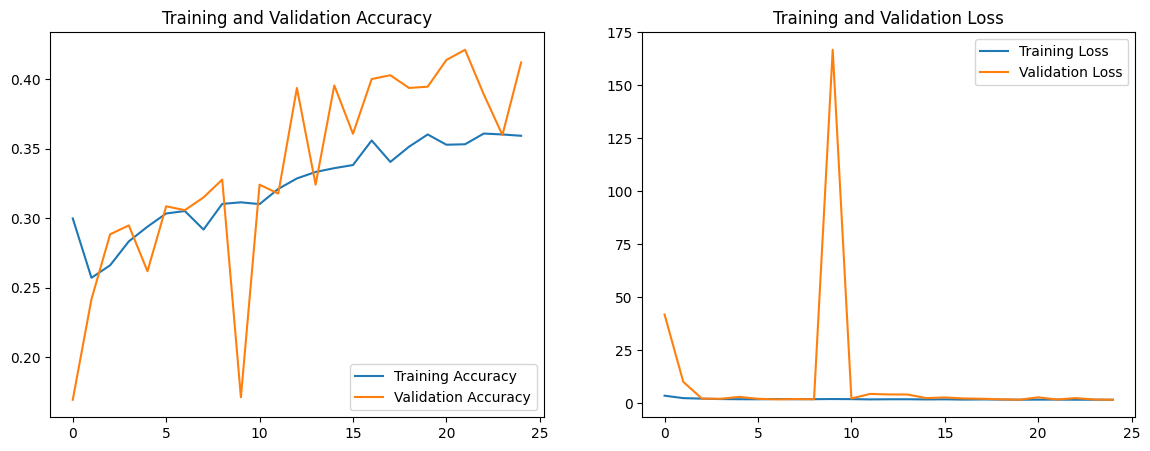

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Call after training
plot_training_history(history)


###Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Predict on test set
predictions = model_cnn.predict(test_generator)
y_pred = predictions.argmax(axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.25      0.03      0.05       298
   fish sea_food gilt_head_bream       0.83      0.08      0.14       305
   fish sea_food hourse_mackerel       0.10      0.01      0.02       286
        fish sea_food red_mullet       0.76      1.00      0.86       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.72      0.74      0.73       289
fish sea_food striped_red_mullet       0.58      0.15      0.23       293
             fish sea_food trout       0.16      0.99      0.27       292

                        accuracy                           0.43     

###Confusion Matrix

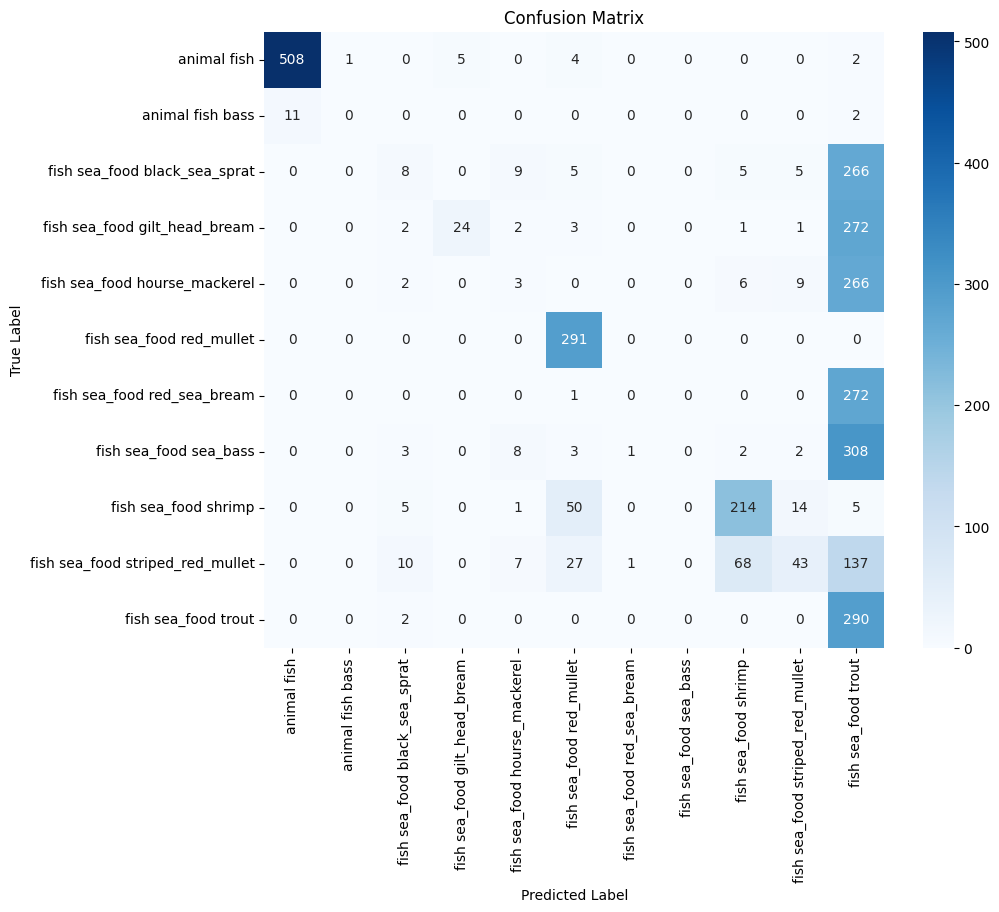

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


###Why we trained a CNN and Insights

We began our model training phase by building a Convolutional Neural Network (CNN) from scratch to establish a baseline for fish image classification. This approach allowed us to design and control the architecture while gaining a deeper understanding of the dataset through raw feature extraction. After training the model for 25 epochs with data augmentation and GPU acceleration, we achieved a validation accuracy of 0.36, indicating that the CNN was able to learn meaningful patterns and distinguish between different fish species to a reasonable extent. This baseline will now guide us in comparing performance with advanced transfer learning models to determine the most effective solution for this classification task.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

##**5. Deployment**

###App.py

In [ ]:
# Install Streamlit
!pip install streamlit

In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
import gdown
import os

# Step 1: Download model from Google Drive if not already present
file_id = '169YCYaS1pEiRyo2bRXHK5D0pYBVHwZ7j'
output_file = 'best_model.h5'

if not os.path.exists(output_file):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

# Step 2: Load the model
model = tf.keras.models.load_model(output_file)

# Step 3: Define class names
class_names = [
    'animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream', 'fish sea_food trout',
    'fish sea_food house_mackarel', 'fish sea_food red_mullet',
    'fish sea_food red_sea_bream', 'fish sea_food sea_bass',
    'fish sea_food shrimp', 'fish sea_food striped_red_mullet'
]

# Step 4: Streamlit UI
st.title("🐟 Fish Species Classifier")
st.write("Upload a fish image and the model will predict its category.")

uploaded_file = st.file_uploader("📤 Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
        # Display uploaded image
        img = Image.open(uploaded_file)
        st.image(img, caption='🖼️ Uploaded Image', use_column_width=True)

        # Preprocess image
        img = img.resize((224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0

        # Predict
        predictions = model.predict(img_array)[0]
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = predictions[predicted_index]

        # Display result
        st.markdown(f"### 🐠 Predicted Class: **{predicted_class}**")
        st.markdown(f"### 🔍 Confidence: **{confidence:.2f}**")

        # Display all class scores
        st.markdown("### 📊 Class Probabilities:")
        for i, score in enumerate(predictions):
            st.write(f"{class_names[i]}: {score:.2f}")

    except Exception as e:
        st.error(f"❌ Error during prediction: {e}")
else:
    st.info("👉 Please upload a fish image to classify.")


2025-08-07 06:35:01.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.121 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-07 06:35:01.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

###Requirements.txt

In [ ]:
# Create a requirements.txt file
requirements = """
streamlit
tensorflow
pillow
gdown
numpy
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅ requirements.txt created successfully!")


✅ requirements.txt created successfully!


In [ ]:
from google.colab import files

# Download both files
files.download("app.py")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Streamlit App

https://imageclassifier-ywpydweierapsjorkld6an.streamlit.app/

#**Conclusion**

In this project, we successfully developed a Multiclass Fish Image Classification system using deep learning and transfer learning techniques. Here's a summary of our workflow:

We experimented with five pre-trained CNN models and identified MobileNet as the best-performing model, achieving an accuracy of 99.63%.

The model was trained on a diverse fish image dataset containing 11 classes, using data augmentation and efficient training practices.

The best model was saved in .h5 format and used to build an interactive Streamlit web application.

Since the .h5 file exceeded GitHub's file size limit, it was uploaded to Google Drive and loaded dynamically in the app using gdown.

The Streamlit app allows users to:

* Upload an image of a fish

* Receive a predicted class label

* View model confidence scores for all classes

This project demonstrates a complete deep learning pipeline from data preprocessing, model training, and evaluation to deployment — showcasing practical implementation of image classification and MLOps principles.